In [ ]:

import pandas as pd

In [ ]:
# load data
df = pd.read_csv('data.csv')
df

,ds,y
0,2013-01-01,0.000000
1,2013-01-02,23720.568982
2,2013-01-03,17329.638000
3,2013-01-04,15771.261980
4,2013-01-05,22380.072040
...,...,...
1619,2017-06-12,27224.354996
1620,2017-06-13,24254.835000
1621,2017-06-14,30156.123000
1622,2017-06-15,23314.491990


In [ ]:
# check data types and nulls
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1624 entries, 0 to 1623
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      1624 non-null   object 
 1   y       1624 non-null   float64
dtypes: float64(1), object(1)
memory usage: 25.5+ KB


In [ ]:
#function convert string to datetime

from datetime import datetime

def convert_string_to_datetime(string_value):
  dt_value = datetime.strptime(string_value, "%Y-%m-%d")
  return dt_value

In [ ]:
#convert column to datetime
df['ds'] = df.ds.apply(convert_string_to_datetime)

In [ ]:
# check data types
df.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [ ]:
#make date the index of the dataframe
df = df.set_index('ds')

<Axes: xlabel='ds'>

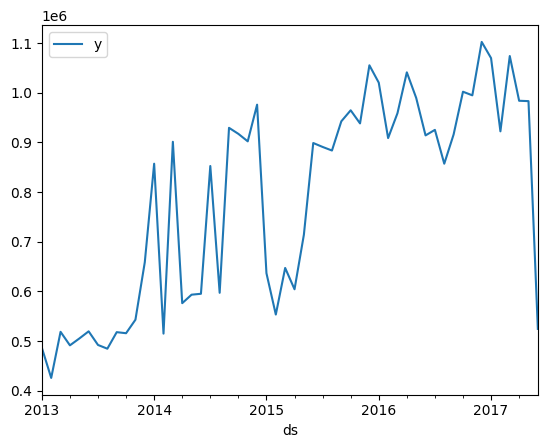

In [ ]:
#create bins of 1 month and plot the sum
df.resample('1M').sum().plot()

<Axes: xlabel='ds'>

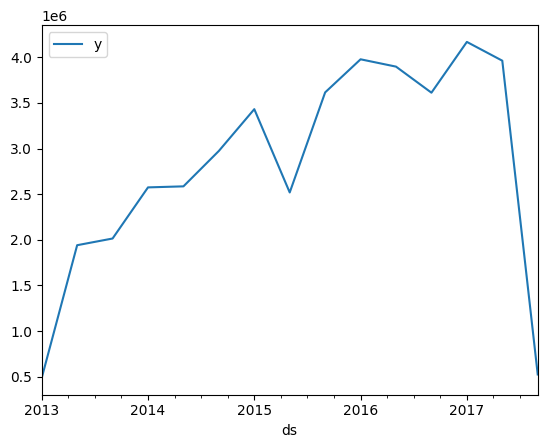

In [ ]:
#create bins of 4 months and plot the sum
df.resample('4M').sum().plot()

<Axes: xlabel='ds'>

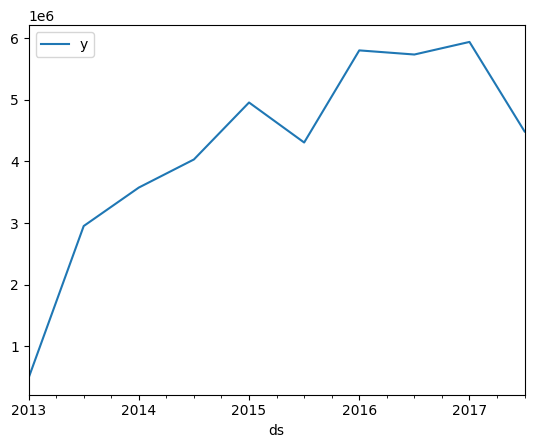

In [ ]:
#create bins of 6 months and plot the sum
df.resample('6M').sum().plot()

<Axes: xlabel='ds'>

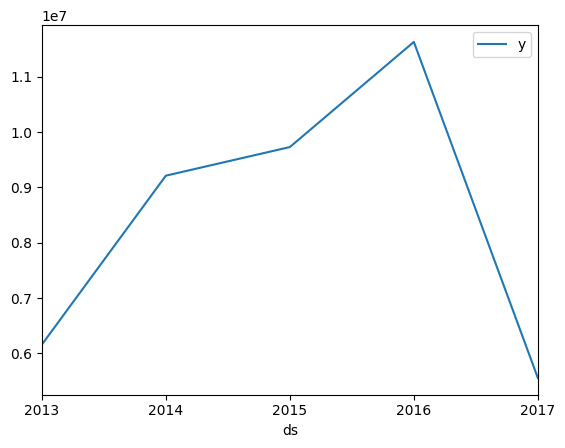

In [ ]:
#create bins of 1 year and plot the sum
df.resample('1Y').sum().plot()

In [ ]:
#plotly plot
import plotly.express as px

fig = px.line(df, x=df.index, y=df.y)
fig.show()

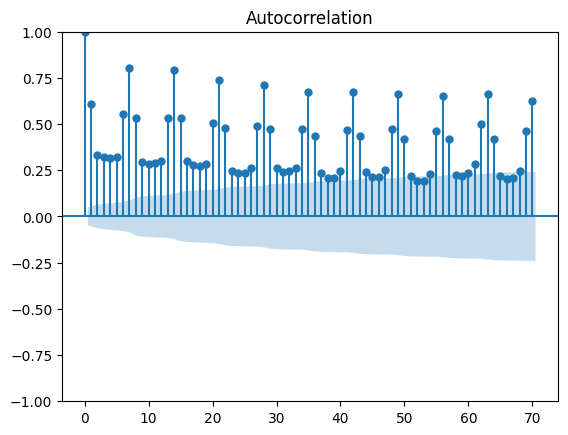

In [ ]:
# acf visualization

from statsmodels.graphics.tsaplots import plot_acf

acf_plot = plot_acf(df.y, lags=70)
acf_plot.show()

Discussion: The data looks like it has a seasonal component because it fluctuates at a fixed frequency. It also looks like it has a trend component and is generally increasing over time.

In [ ]:
#splitting data, 90-10

train = df.y[:1462]
test = df.y[1462:]
train.shape, test.shape

((1462,), (162,))

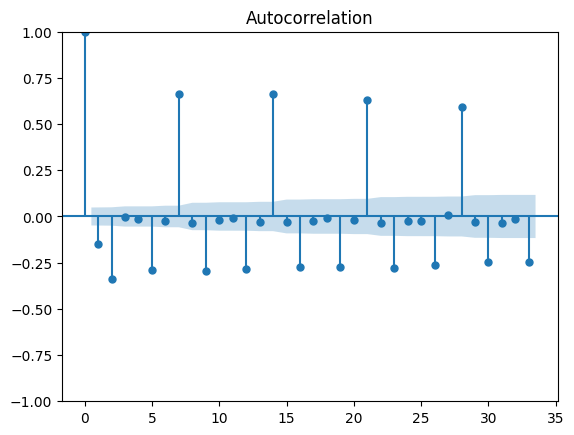

In [ ]:
#afc with first order differencing
acf_plot = plot_acf(df.y.diff().dropna())
acf_plot.show()

Discussion: The data looks a bit more stationary after applying first order differencing, and applying second order did not make much of a difference in the afc plot. The trend for this data also looked more linear that quadratic so it makes sense to use first order differencing.

Based on this I'm gessing the order of integartion (d) is 1.

Considering that the correlation is significant around lags 1 and 2, and the following lags are inside the blue boundary, I would guess q = 1 or 2.

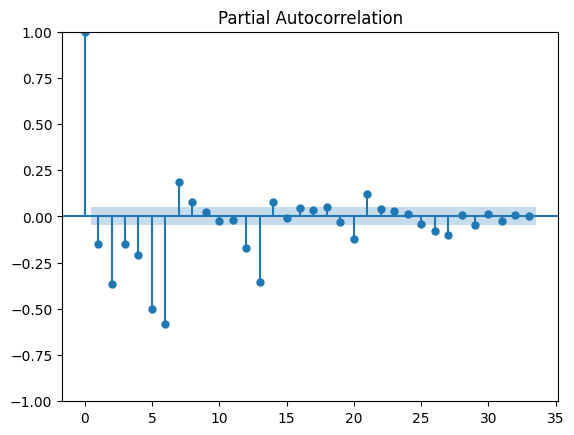

In [ ]:
#pacf plot
from statsmodels.graphics.tsaplots import plot_pacf
pacf_plot = plot_pacf(df.y.diff().dropna())
pacf_plot.show()

Dicussion: The partial correaltion is significant for lags around 1-7, so I would guess p = 1-7.

In [ ]:
#import and build arima model using d= 1, p = 2, q=2
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order=(2, 1, 2))
model_fit = model.fit()
model_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1462
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -14941.034
Date:                Wed, 06 Dec 2023   AIC                          29892.067
Time:                        00:51:05   BIC                          29918.501
Sample:                             0   HQIC                         29901.928
                               - 1462                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8891      0.034     26.418      0.000       0.823       0.955
ar.L2         -0.5004      0.019    -25.920      0.000      -0.538      -0.463
ma.L1         -1.4809      0.033    -44.530      0.000      -1.546      -1.416
ma.L2          0.5635      0.031     18.013      0.000       0.502       0.625
sigma2      4.037e+07   7.75e-10   5.21e+16      0.000    4.04e+07    4.04e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               642.19
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               2.36   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.12e+32. Standard errors may be unstable.
"""

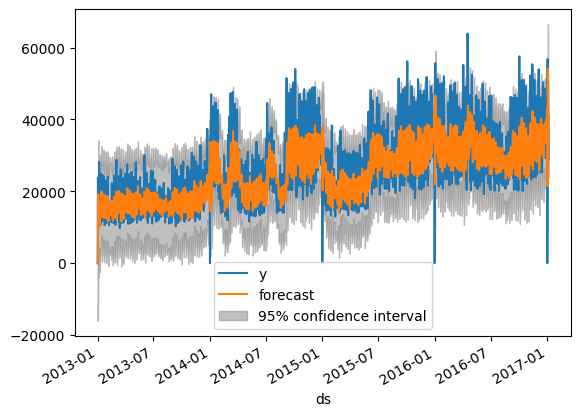

In [ ]:
#plot model
from statsmodels.graphics.tsaplots import plot_predict
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

train.plot(ax=ax)

f1 = plot_predict(model_fit, ax=ax)
f1.show()

In [ ]:
#create forcast data
fc = model_fit.forecast(162)
fc

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



1462    31603.439860
1463    35825.845825
1464    38186.728823
1465    38172.980990
1466    36979.455277
            ...     
1619    36231.771640
1620    36231.771640
1621    36231.771640
1622    36231.771640
1623    36231.771640
Name: predicted_mean, Length: 162, dtype: float64

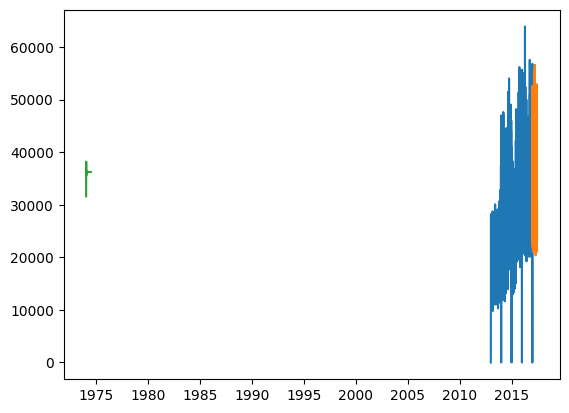

In [ ]:
#plot forecast
plt.figure()
plt.plot(train, label='training')
plt.plot(test, label='testing')
plt.plot(fc, label='fc')

In [ ]:
#the forecast graph looked weird because it did not detect frequency in the data when the model was created
#resampling it to daily frequency to try to fix this.
train2 = train.resample("D").first()
test2 = test.resample("D").first()
train2, test2

(ds
 2013-01-01        0.000000
 2013-01-02    23720.568982
 2013-01-03    17329.638000
 2013-01-04    15771.261980
 2013-01-05    22380.072040
                   ...     
 2017-01-01        0.000000
 2017-01-02    56806.630000
 2017-01-03    42744.222810
 2017-01-04    40858.424005
 2017-01-05    28819.188980
 Freq: D, Name: y, Length: 1466, dtype: float64,
 ds
 2017-01-06    35013.501010
 2017-01-07    45131.439990
 2017-01-08    52624.423000
 2017-01-09    31488.330000
 2017-01-10    27921.906000
                   ...     
 2017-06-12    27224.354996
 2017-06-13    24254.835000
 2017-06-14    30156.123000
 2017-06-15    23314.491990
 2017-06-16    30598.837000
 Freq: D, Name: y, Length: 162, dtype: float64)

In [ ]:
#building model again with resampled data
model2 = ARIMA(train2, order=(2, 1, 2))
model_fit2 = model2.fit()
model_fit2.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1466
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -14989.447
Date:                Wed, 06 Dec 2023   AIC                          29988.894
Time:                        02:10:19   BIC                          30015.343
Sample:                    01-01-2013   HQIC                         29998.759
                         - 01-05-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3473      0.037     -9.434      0.000      -0.419      -0.275
ar.L2          0.0571      0.031      1.860      0.063      -0.003       0.117
ma.L1         -0.1704      0.034     -5.076      0.000      -0.236      -0.105
ma.L2         -0.7420      0.033    -22.600      0.000      -0.806      -0.678
sigma2      3.985e+07   1.05e-09   3.78e+16      0.000    3.98e+07    3.98e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):               427.81
Prob(Q):                              0.70   Prob(JB):                         0.00
Heteroskedasticity (H):               2.38   Skew:                             0.55
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.25e+33. Standard errors may be unstable.
"""

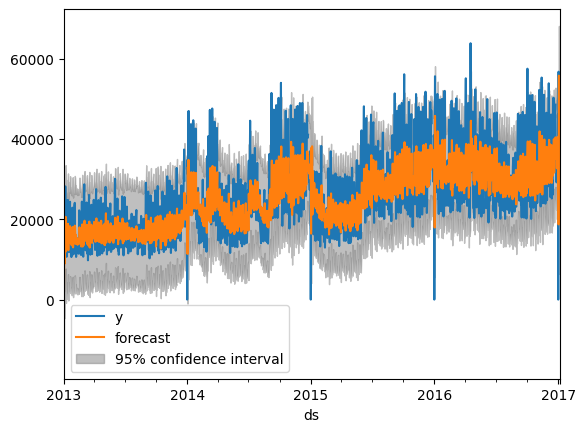

In [ ]:
#plot model again
from statsmodels.graphics.tsaplots import plot_predict
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

train2.plot(ax=ax)

f2 = plot_predict(model_fit2, ax=ax)
f2.show()

In [ ]:
#create forcast data again
fc2 = model_fit2.forecast(162)
fc2

2017-01-06    24258.877145
2017-01-07    39099.608542
2017-01-08    33685.235493
2017-01-09    36413.278648
2017-01-10    35156.602013
                  ...     
2017-06-12    35560.015267
2017-06-13    35560.015267
2017-06-14    35560.015267
2017-06-15    35560.015267
2017-06-16    35560.015267
Freq: D, Name: predicted_mean, Length: 162, dtype: float64

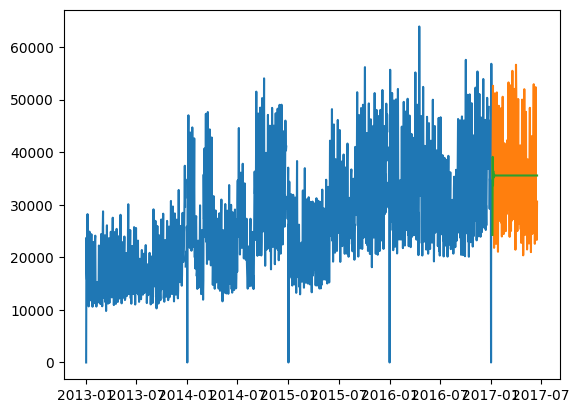

In [ ]:
#plot forecast again.
plt.figure()
plt.plot(train2, label='training')
plt.plot(test2, label='testing')
plt.plot(fc2, label='fc')